In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
#?

In [2]:
data = './CNN_dataset/CNN_dataset'

# categories
categories= ['AbdomenCT', 'ChestCT', 'CXR', 'Hand', 'HeadCT']

In [ ]:
# storing images and labels
images = []
lables = []

for label, class_name in enumerate(categories): #?
    class_path = os.path.join(data,class_path)
    for file in os.listdir(class_path):
        if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
            imgPath = os.path.join(class_path,file)


            img = Image.open(imgPath).convert('L')
            img = img.resize((128,128))
            images.append(np.array(img))
            lables.append(lables)


In [ ]:
# converting list to arrays{numpy}

images = np.array(images,dtype='float32') / 255.0 # coverting to 0 and 1
images = np.expand_dims(images,axis=-1)
lables = np.array(lables)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(images, lables, test_size=0.2, random_state=42)


In [ ]:
# training the model

CNN = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(input_shape=(128, 128, 3)),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')
])

CNN.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
CNN.fit(x_train, y_train, epochs=5)

Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 166s 129ms/step - accuracy: 0.9595 - loss: 0.1190
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 288s 231ms/step - accuracy: 0.9953 - loss: 0.0189
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 206s 164ms/step - accuracy: 0.9993 - loss: 0.0026
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 205s 164ms/step - accuracy: 0.9980 - loss: 0.0067
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 162s 129ms/step - accuracy: 0.9996 - loss: 0.0022


In [17]:
CNN.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.9986 - loss: 0.0050


[0.006432871799916029, 0.9987000226974487]

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step
Prediction is  CXR


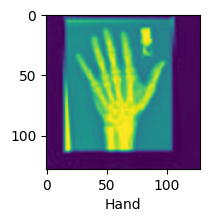

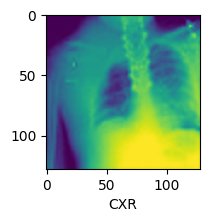

In [22]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(categories[y[index]])

plot_sample(x_train, y_train, 0)

y_pred = CNN.predict(x_test)

plot_sample(x_test, y_test, 15)

print("Prediction is " , categories[np.argmax(y_pred[15])])